In [1]:
import kaggle

# Authenticate with Kaggle
kaggle. api.authenticate()

# Download the files
kaggle. api.dataset_download_files('bhanupratapbiswas/inventory-analysis-case-study', path='inventory_data', unzip=True)

# List the downloaded files
import os
files = os.listdir('inventory_data')
print(files)

Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/inventory-analysis-case-study
['.ipynb_checkpoints', '2017PurchasePricesDec.csv', 'BegInvFINAL12312016.csv', 'EndInvFINAL12312016.csv', 'InvoicePurchases12312016.csv', 'PurchasesFINAL12312016.csv', 'SalesFINAL12312016.csv']


In [3]:
import pandas as pd

# Load the data
purchase_prices = pd.read_csv('inventory_data/2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('inventory_data/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('inventory_data/EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('inventory_data/InvoicePurchases12312016.csv')
purchases = pd.read_csv('inventory_data/PurchasesFINAL12312016.csv')
sales = pd.read_csv('inventory_data/SalesFINAL12312016.csv')

In [4]:
print(purchase_prices.head())  # view the first few rows of the purchase prices data
print(beg_inv.info())  # view the structure and summary statistics of the beginning inventory data
print(end_inv.describe())  # view summary statistics of the ending inventory data

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  -

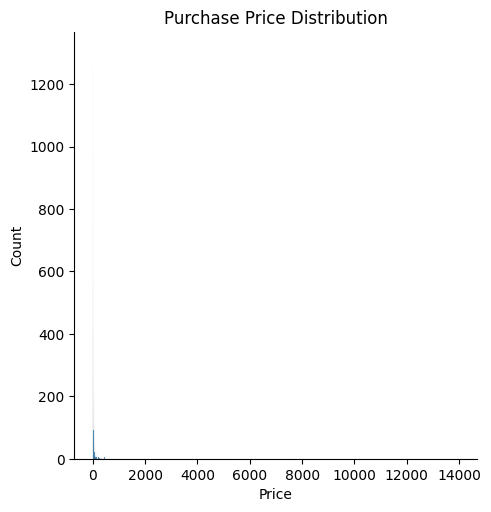

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the purchase prices data
sns.displot(purchase_prices['Price'])
plt.title('Purchase Price Distribution')
plt.show()

In [12]:
print(beg_inv.columns)

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')


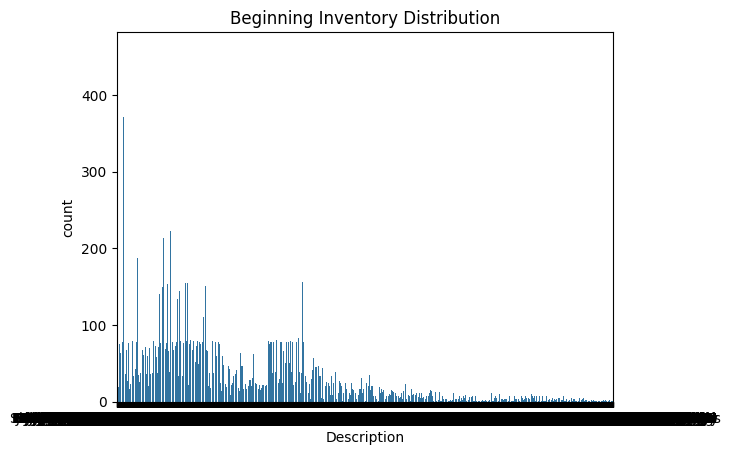

In [13]:
sns.countplot(x='Description', data=beg_inv)
plt.title('Beginning Inventory Distribution')
plt.show()

In [14]:
#top_products
top_products = beg_inv.nlargest(10, 'onHand')
print(top_products)

               InventoryId  Store        City  Brand              Description  \
173397   69_MOUNTMEND_3858     69   MOUNTMEND   3858         Grey Goose Vodka   
204102   79_BALLYMENA_3859     79   BALLYMENA   3859        Smirnoff 80 Proof   
79437    34_PITMERDEN_3876     34   PITMERDEN   3876        Smirnoff 80 Proof   
157944       65_LUTON_7341     65       LUTON   7341      Smirnoff Watermelon   
78556    34_PITMERDEN_1233     34   PITMERDEN   1233  Jack Daniels No 7 Black   
80298    34_PITMERDEN_8068     34   PITMERDEN   8068         Absolut 80 Proof   
119474   50_MOUNTMEND_4261     50   MOUNTMEND   4261   Capt Morgan Spiced Rum   
79432    34_PITMERDEN_3858     34   PITMERDEN   3858         Grey Goose Vodka   
196395   76_DONCASTER_8068     76   DONCASTER   8068         Absolut 80 Proof   
164412  67_EANVERNESS_3545     67  EANVERNESS   3545          Ketel One Vodka   

         Size  onHand  Price   startDate  
173397  750mL    1251  23.99  2016-01-01  
204102  375mL    1163 

In [15]:
#product_distribution
product_distribution = beg_inv.groupby(['Store', 'Description']).size().reset_index(name='Count')
print(product_distribution)

        Store                   Description  Count
0           1                        (RI) 1      1
1           1        14 Hands Cab Svgn Wash      1
2           1           14 Hands Chard Wash      1
3           1      14 Hands Hot to Trot Red      1
4           1          14 Hands Merlot Wash      1
...       ...                           ...    ...
176176     79        Zhenka Vodka 100 Proof      1
176177     79          Zhenka Vodka Plastic      1
176178     79    Zorvino Bacca Z Blackberry      1
176179     79  Zorvino Fragole Z Strawberry      1
176180     79            Zorvino Vyds Pearz      1

[176181 rows x 3 columns]


In [16]:
#brand_distribution
brand_distribution = beg_inv.groupby(['Brand', 'Description']).size().reset_index(name='Count')
print(brand_distribution)

      Brand                   Description  Count
0        58   Gekkeikan Black & Gold Sake     35
1        60        Canadian Club 1858 VAP     52
2        61         Margaritaville Silver      1
3        62      Herradura Silver Tequila     72
4        63    Herradura Reposado Tequila     68
...     ...                           ...    ...
8089  90086  La Dame Montrose St Estep 11      6
8090  90087  Ch Mouton Rothschild 12 Paui      8
8091  90088  Ch Le Petite Mouton 12 Pauil      5
8092  90089    Ch Lynch Bages 12 Pauillac      9
8093  90090       Ch Lafite Rothschild 12      5

[8094 rows x 3 columns]


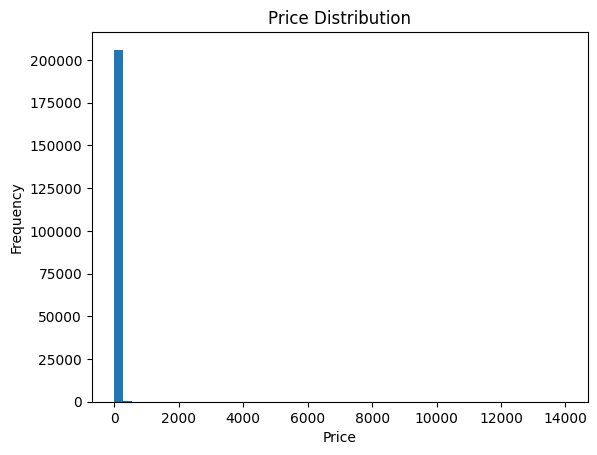

In [17]:
#Price distribution
plt.hist(beg_inv['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [29]:
#Analyze purchase prices
print("Purchase Price Analysis")
print("-----------------------")
print(purchase_prices.describe())
print(purchase_prices.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10))
print(purchase_prices.groupby('Classification')['Price'].mean().sort_values(ascending=False).head(10))

Purchase Price Analysis
-----------------------
              Brand         Price  Classification  PurchasePrice  \
count  12261.000000  12261.000000    12261.000000   12261.000000   
mean   17989.067123     38.640240        1.708996      26.488220   
std    12528.503464    206.151172        0.454244     156.182948   
min       58.000000      0.000000        1.000000       0.000000   
25%     5990.000000     10.990000        1.000000       6.890000   
50%    18788.000000     15.990000        2.000000      10.650000   
75%    25117.000000     29.990000        2.000000      20.130000   
max    90631.000000  13999.900000        2.000000   11111.030000   

        VendorNumber  
count   12261.000000  
mean    10814.861757  
std     19007.682322  
min         2.000000  
25%      3960.000000  
50%      7153.000000  
75%      9552.000000  
max    173357.000000  
Brand
2693     13999.90
3949      7499.99
2367      5799.99
4423      4999.99
1991      4999.99
423       4559.99
16191     4222.99


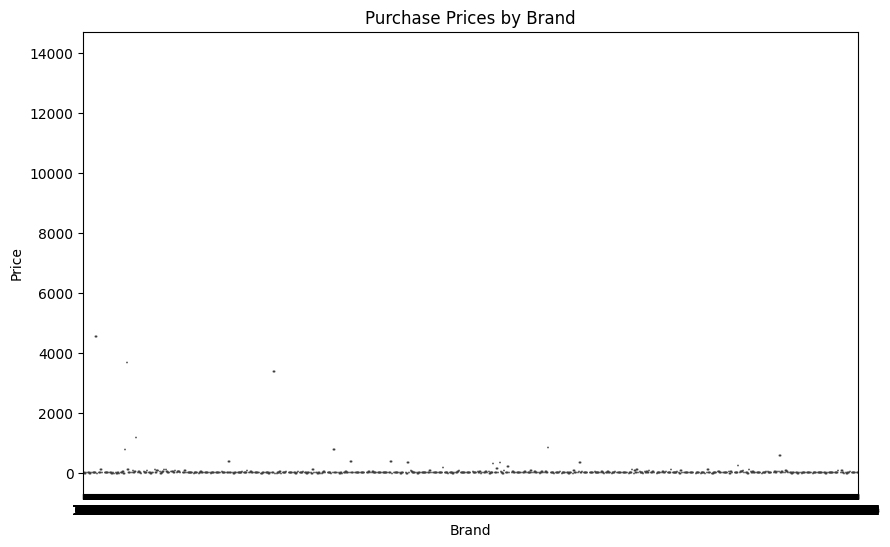

In [30]:
# Plot purchase prices by brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=purchase_prices)
plt.title('Purchase Prices by Brand')
plt.show()

In [31]:
# Analyze purchases
print("\nPurchases Analysis")
print("-----------------")
print(purchases.describe())
print(purchases.groupby('VendorNumber')['Dollars'].sum().sort_values(ascending=False).head(10))
print(purchases.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10))


Purchases Analysis
-----------------
              Store         Brand  VendorNumber      PONumber  PurchasePrice  \
count  2.372474e+06  2.372474e+06  2.372474e+06  2.372474e+06   2.372474e+06   
mean   4.465133e+01  1.241864e+04  6.886436e+03  1.104094e+04   1.205005e+01   
std    2.351245e+01  1.255728e+04  8.066694e+03  1.565340e+03   1.794510e+01   
min    1.000000e+00  5.800000e+01  2.000000e+00  8.106000e+03   0.000000e+00   
25%    2.500000e+01  3.639000e+03  3.252000e+03  9.761000e+03   6.120000e+00   
50%    4.800000e+01  6.523000e+03  4.425000e+03  1.110300e+04   9.220000e+00   
75%    6.700000e+01  1.887700e+04  9.552000e+03  1.239700e+04   1.449000e+01   
max    8.100000e+01  9.063100e+04  2.013590e+05  1.366100e+04   5.681810e+03   

           Quantity       Dollars  Classification  
count  2.372474e+06  2.372474e+06    2.372474e+06  
mean   1.415585e+01  1.356815e+02    1.443520e+00  
std    2.344616e+01  2.816649e+02    4.967999e-01  
min    1.000000e+00  0.000000e+00

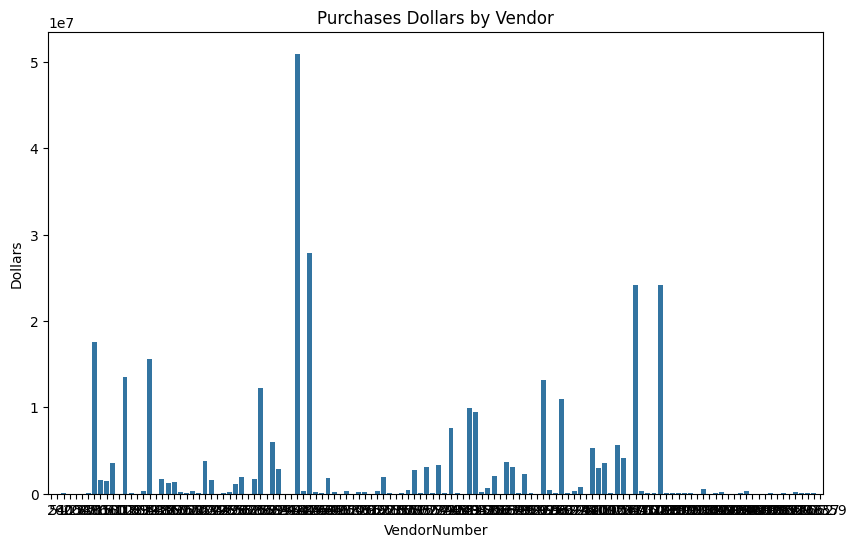

In [32]:
# Plot purchases dollars by vendor
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorNumber', y='Dollars', data=purchases.groupby('VendorNumber')['Dollars'].sum().reset_index())
plt.title('Purchases Dollars by Vendor')
plt.show()

In [33]:
# Analyze sales
print("\nSales Analysis")
print("--------------")
print(sales.describe())
print(sales.groupby('Store')['SalesDollars'].sum().sort_values(ascending=False).head(10))
print(sales.groupby('Brand')['SalesDollars'].sum().sort_values(ascending=False).head(10))


Sales Analysis
--------------
              Store         Brand  SalesQuantity  SalesDollars    SalesPrice  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.008063e+01  1.216959e+04   2.337619e+00  3.160420e+01  1.543162e+01   
std    2.435739e+01  1.241921e+04   3.511492e+00  6.570249e+01  1.404967e+01   
min    1.000000e+00  5.800000e+01   1.000000e+00  4.900000e-01  4.900000e-01   
25%    1.500000e+01  3.680000e+03   1.000000e+00  1.099000e+01  8.990000e+00   
50%    3.900000e+01  6.296000e+03   1.000000e+00  1.799000e+01  1.299000e+01   
75%    6.400000e+01  1.795400e+04   2.000000e+00  3.199000e+01  1.899000e+01   
max    7.900000e+01  9.008900e+04   4.320000e+02  1.327997e+04  4.999990e+03   

             Volume  Classification     ExciseTax      VendorNo  
count  1.048575e+06    1.048575e+06  1.048575e+06  1.048575e+06  
mean   9.500280e+02    1.416550e+00  1.326847e+00  6.995043e+03  
std    7.142708e+02    4.929872e-01  3.407898e+00 

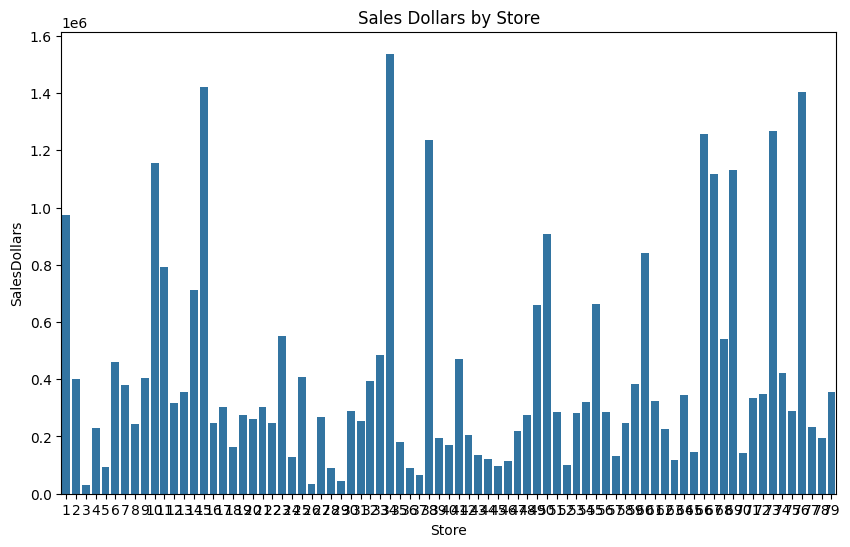

In [34]:
# Plot sales dollars by store
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='SalesDollars', data=sales.groupby('Store')['SalesDollars'].sum().reset_index())
plt.title('Sales Dollars by Store')
plt.show()

In [35]:
# Merge purchase prices and sales
merged_data = pd.merge(purchase_prices, sales, on=['Brand', 'Description'])

# Analyze sales by product
print("\nSales by Product")
print("----------------")
print(merged_data.groupby('Description')['SalesQuantity'].sum().sort_values(ascending=False).head(10))


Sales by Product
----------------
Description
Smirnoff 80 Proof               43423
Capt Morgan Spiced Rum          35866
Dr McGillicuddy's Mentholmnt    24188
Yukon Jack                      24037
Jack Daniels No 7 Black         23797
Absolut 80 Proof                23171
Smirnoff Raspberry Vodka        22459
Jim Beam                        21239
Tito's Handmade Vodka           20125
Canadian Club                   19187
Name: SalesQuantity, dtype: int64


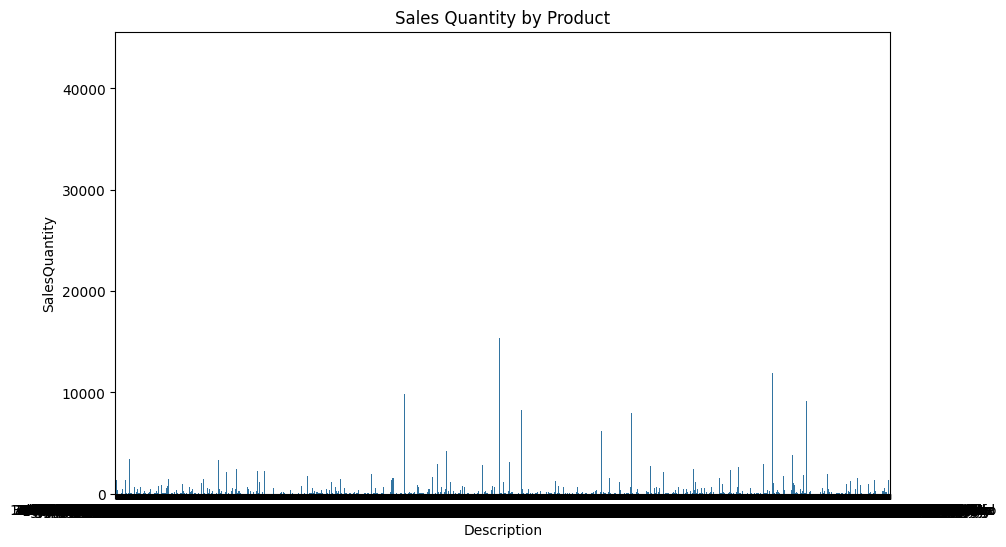

In [36]:
# Plot sales quantity by product
plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='SalesQuantity', data=merged_data.groupby('Description')['SalesQuantity'].sum().reset_index())
plt.title('Sales Quantity by Product')
plt.show()

In [39]:
print(beg_inv.columns)
print(end_inv.columns)
print(invoice_purchases.columns)

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')
Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')


In [40]:
# Analyze beginning inventory
print("\nBeginning Inventory Analysis")
print("----------------------------")
print(beg_inv.describe())
print(beg_inv.groupby('Brand')['onHand'].sum().sort_values(ascending=False).head(10))
print(beg_inv.groupby('City')['onHand'].sum().sort_values(ascending=False).head(10))


Beginning Inventory Analysis
----------------------------
               Store          Brand         onHand          Price
count  206529.000000  206529.000000  206529.000000  206529.000000
mean       42.122457   13761.482320      20.429455      22.253910
std        23.191393   13059.429355      31.467342      70.178964
min         1.000000      58.000000       0.000000       0.000000
25%        22.000000    3746.000000       7.000000       9.990000
50%        42.000000    8010.000000      12.000000      14.990000
75%        64.000000   22143.000000      21.000000      21.990000
max        79.000000   90090.000000    1251.000000   13999.900000
Brand
4261    15499
8068    15341
3876    14829
3545    14499
6879    14180
3858    13649
8111    13521
1233    12016
4243    11640
6570    11586
Name: onHand, dtype: int64
City
EANVERNESS      365129
MOUNTMEND       346472
DONCASTER       302759
HORNSEY         206481
GOULCREST       162880
PITMERDEN       153852
DRY GULCH       119641
BALLYMEN

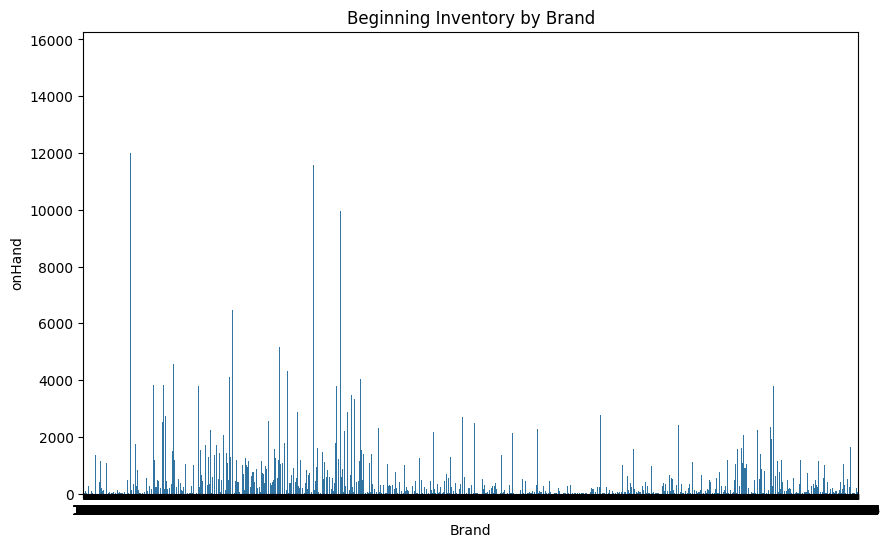

In [41]:
# Plot beginning inventory by brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='onHand', data=beg_inv.groupby('Brand')['onHand'].sum().reset_index())
plt.title('Beginning Inventory by Brand')
plt.show()

In [42]:
# Analyze ending inventory
print("\nEnding Inventory Analysis")
print("----------------------------")
print(end_inv.describe())
print(end_inv.groupby('Brand')['onHand'].sum().sort_values(ascending=False).head(10))
print(end_inv.groupby('City')['onHand'].sum().sort_values(ascending=False).head(10))


Ending Inventory Analysis
----------------------------
               Store          Brand         onHand          Price
count  224489.000000  224489.000000  224489.000000  224489.000000
mean       43.505740   14356.370513      21.763988      23.585583
std        23.326415   13118.467851      37.233576      79.202775
min         1.000000      58.000000       0.000000       0.490000
25%        23.000000    3798.000000       7.000000       9.990000
50%        44.000000    8259.000000      12.000000      14.990000
75%        66.000000   23965.000000      22.000000      23.490000
max        81.000000   90631.000000    3676.000000   13999.900000
Brand
3545    16770
4261    16769
8111    16242
8068    15608
1233    15047
3102    14208
5111    13804
1376    13180
6570    13016
1892    12764
Name: onHand, dtype: int64
City
MOUNTMEND       531404
EANVERNESS      368914
DONCASTER       308455
HORNSEY         208309
GOULCREST       177700
PAENTMARWY      166015
PITMERDEN       145829
LARNWICK   

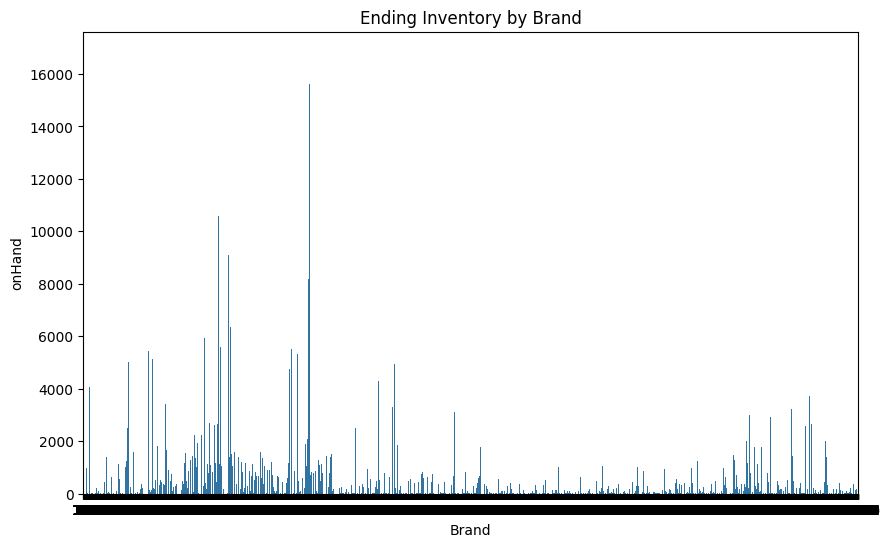

In [43]:
# Plot ending inventory by brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='onHand', data=end_inv.groupby('Brand')['onHand'].sum().reset_index())
plt.title('Ending Inventory by Brand')
plt.show()

In [44]:
# Analyze invoice purchases
print("\nInvoice Purchases Analysis")
print("----------------------------")
print(invoice_purchases.describe())
print(invoice_purchases.groupby('VendorNumber')['Dollars'].sum().sort_values(ascending=False).head(10))
print(invoice_purchases.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10))


Invoice Purchases Analysis
----------------------------
       VendorNumber      PONumber       Quantity       Dollars      Freight
count    5543.00000   5543.000000    5543.000000  5.543000e+03  5543.000000
mean    20662.75212  10889.419087    6058.880931  5.807338e+04   295.954301
std     34582.15841   1600.859969   14453.338164  1.402340e+05   713.585093
min         2.00000   8106.000000       1.000000  4.140000e+00     0.020000
25%      3089.00000   9503.500000      83.000000  9.678100e+02     5.020000
50%      7240.00000  10890.000000     423.000000  4.765450e+03    24.730000
75%     10754.00000  12275.500000    5100.500000  4.458718e+04   229.660000
max    201359.00000  13661.000000  141660.000000  1.660436e+06  8468.220000
VendorNumber
3960     50959796.85
4425     27861690.02
12546    24203151.05
17035    24124091.56
480      17624378.72
1392     15573917.90
1128     13529433.08
9165     13210613.93
3252     12289608.09
9552     10935817.30
Name: Dollars, dtype: float64
Vendor

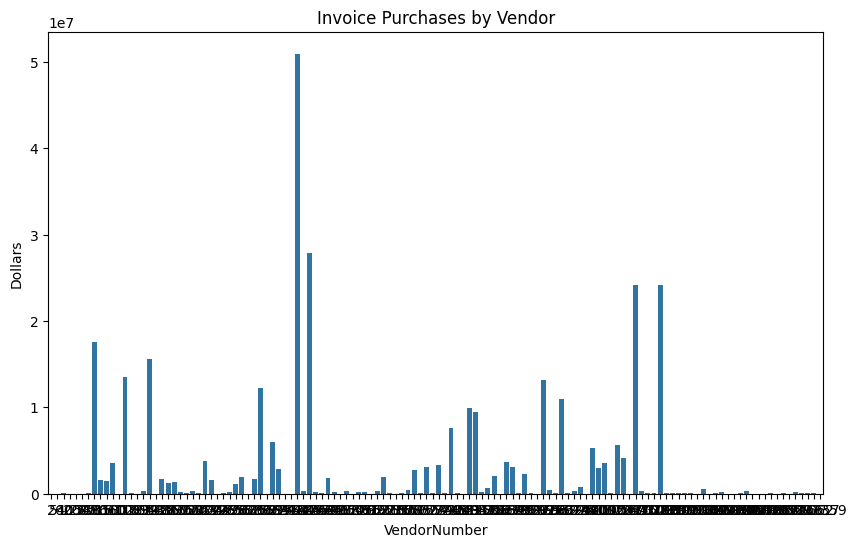

In [45]:
# Plot invoice purchases by vendor
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorNumber', y='Dollars', data=invoice_purchases.groupby('VendorNumber')['Dollars'].sum().reset_index())
plt.title('Invoice Purchases by Vendor')
plt.show()

In [51]:
# Merge beginning and ending inventory
merged_inventory = pd.merge(beg_inv, end_inv, on=['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size'], suffixes=('_beg', '_end'))

In [53]:
# Analyze inventory changes
print("\nInventory Changes Analysis")
print("----------------------------")
result = merged_inventory.groupby('Brand')[['onHand_beg', 'onHand_end']].sum()
print(result.sort_values(by='onHand_beg', ascending=False).head(10))


Inventory Changes Analysis
----------------------------
       onHand_beg  onHand_end
Brand                        
4261        15438       16474
8068        15287       15203
3545        14422       16359
3858        13574       10324
8111        13391       16115
6879        12234        4166
1233        11952       14791
4243        11590       10804
6570        11528       12828
1376        11333       13023


In [ ]:
# Plot inventory changes by brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='onHand_beg', data=merged_inventory.groupby('Brand')[['onHand_beg']].sum().reset_index(), label='Beginning Inventory')
sns.barplot(x='Brand', y='onHand_end', data=merged_inventory.groupby('Brand')[['onHand_end']].sum().reset_index(), label='Ending Inventory')
plt.title('Inventory Changes by Brand')
plt.legend()
plt.show()